# Simpson paradox & gender pay gap

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Palette

In [3]:
# Set a style
sns.set_style("white")
sns.despine(left=True, bottom=True)
# Set a custom color palette
sns.set_palette("gist_stern")

<Figure size 640x480 with 0 Axes>

## Dataset creation

In [4]:
# Function to generate normal distribution
def generate_normal_distribution(mean, std_dev, number):
    # Generate a normal distribution with the specified mean, standard deviation and number of occurencies
    data = np.random.normal(mean, std_dev, number)
    return data

In [5]:
# Set the mean and number of occurrences
# Female Non management
fn_mean = 2600
fn_stdd = 700
fn_numb = 950

# Female management
fm_mean = 4200
fm_stdd = 1000
fm_numb = 50

# Male Non management
mn_mean = 2400
mn_stdd = 700
mn_numb = 750

# Male management
mm_mean = 4000
mm_stdd = 1000
mm_numb = 250

In [6]:
# Generate normal distribution for the 4 populations
# Female Non management
normal_fn = generate_normal_distribution(fn_mean, fn_stdd, fn_numb)
df_fn = pd.DataFrame({'Salary': normal_fn})
# Female management
normal_fm = generate_normal_distribution(fm_mean, fm_stdd, fm_numb)
df_fm = pd.DataFrame({'Salary': normal_fm})
# Male Non management
normal_mn = generate_normal_distribution(mn_mean, mn_stdd, mn_numb)
df_mn = pd.DataFrame({'Salary': normal_mn})
# Male management
normal_mm = generate_normal_distribution(mm_mean, mm_stdd, mm_numb)
df_mm = pd.DataFrame({'Salary': normal_mm})

In [7]:
# Name columns
df_fn["Gender"]="Female"
df_fn["Job family"]="Non management"
df_fn["Gender Job family"]="Female Non management"

df_fm["Gender"]="Female"
df_fm["Job family"]="Management"
df_fm["Gender Job family"]="Female Management"

df_mn["Gender"]="Male"
df_mn["Job family"]="Non management"
df_mn["Gender Job family"]="Male Non management"

df_mm["Gender"]="Male"
df_mm["Job family"]="Management"
df_mm["Gender Job family"]="Male Management"

In [8]:
# Create the final dataset from the 4 previous distributions
df = pd.concat([df_fn, df_fm, df_mn, df_mm], ignore_index=True)

## Viz'

### Density plots

Text(0.5, 1.0, 'Salary distribution')

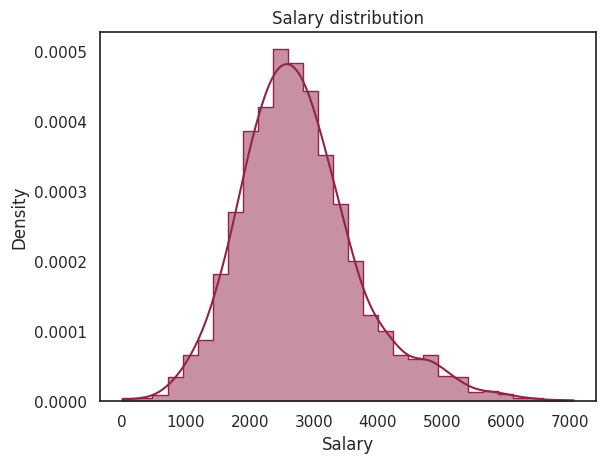

In [9]:
# Salary distribution
sns.histplot(data=df, bins=30, x='Salary', kde=True, element="step", stat="density").set_title('Salary distribution')

Text(0.5, 1.0, 'Salary distribution by gender')

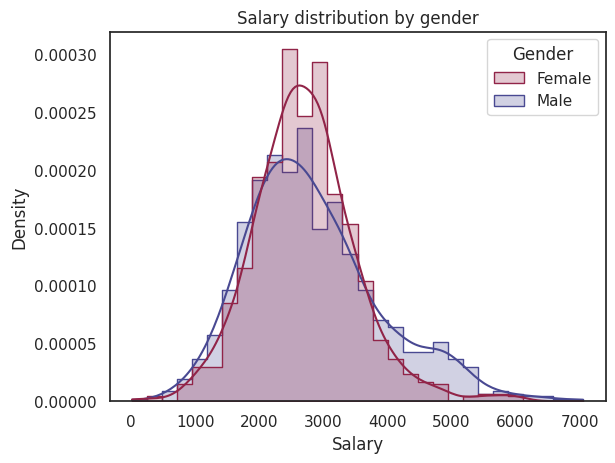

In [10]:
# Salary distribution by gender
sns.histplot(data=df, bins=30, x='Salary', kde=True, hue='Gender',  element="step", stat="density").set_title('Salary distribution by gender')

Text(0.5, 1.0, 'Salary distribution by gender and job family')

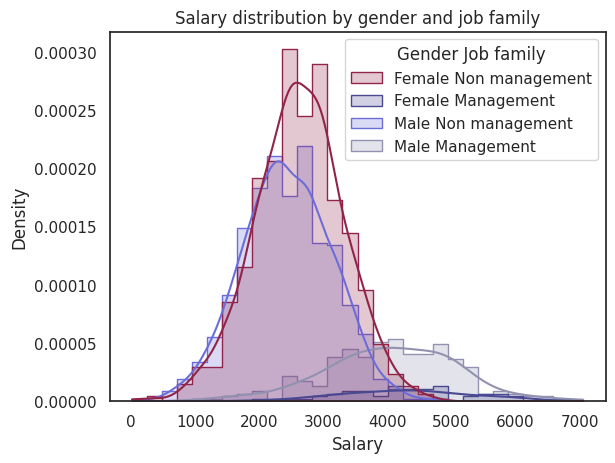

In [11]:
# Salary distribution by gender and job family
sns.histplot(data=df, bins=30, x='Salary', kde=True, hue='Gender Job family', element="step", stat="density").set_title('Salary distribution by gender and job family')

Text(0.5, 1.0, 'Salary distribution by job family')

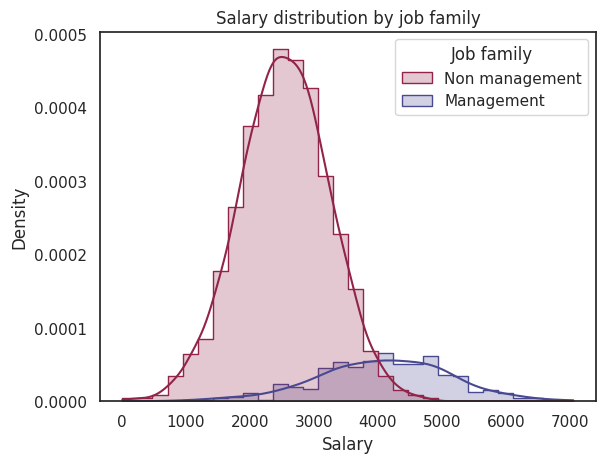

In [12]:
# Salary distribution by job family
sns.histplot(data=df, bins=30, x='Salary', kde=True, hue='Job family',  element="step", stat="density").set_title('Salary distribution by job family')

Text(0.5, 1.0, 'Salary distribution by job family')

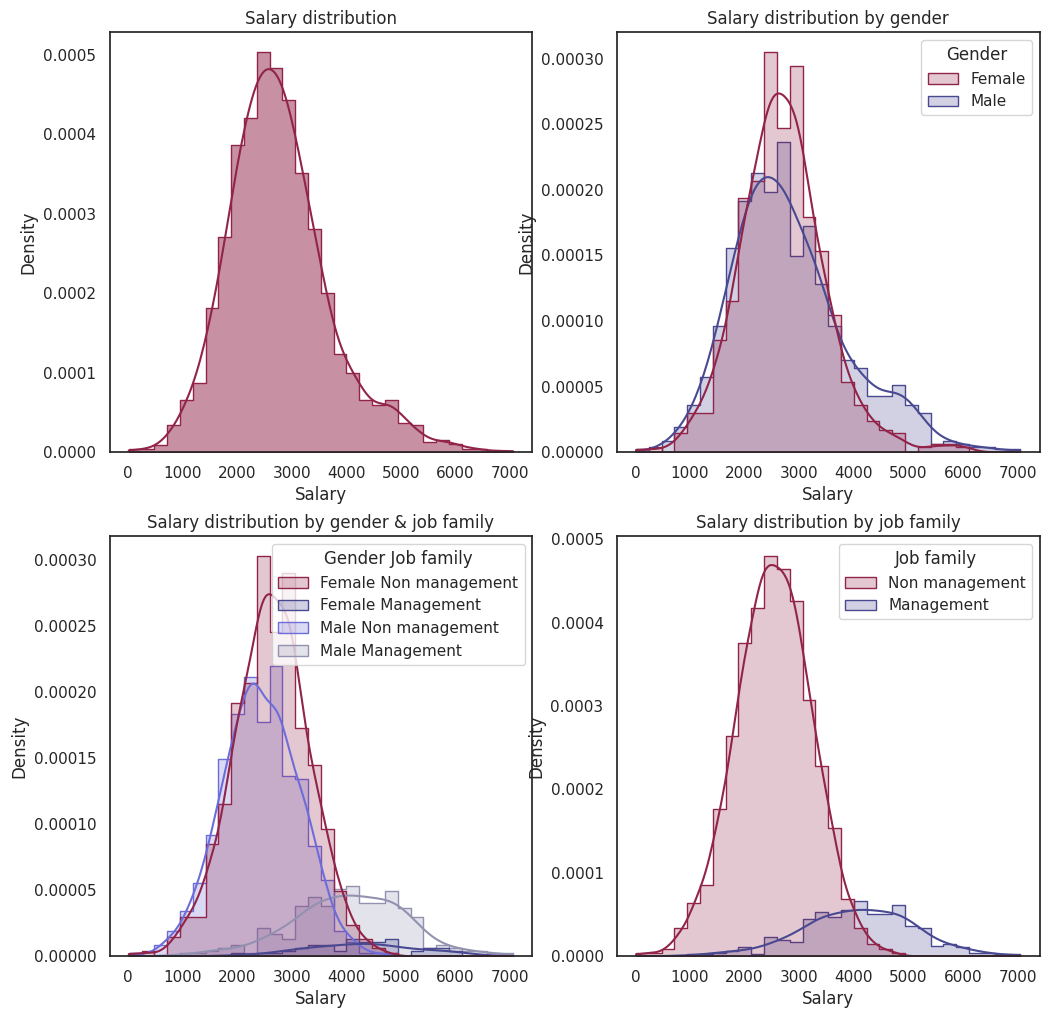

In [13]:
# Set up the figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Salary distribution
sns.histplot(data=df, bins=30, x='Salary', kde=True, ax=axes[0, 0], element="step", stat="density")
axes[0, 0].set_title('Salary distribution')

# Salary distribution by gender
sns.histplot(data=df, bins=30, x='Salary', kde=True, hue='Gender',  ax=axes[0, 1], element="step", stat="density")
axes[0, 1].set_title('Salary distribution by gender')

# Salary distribution by gender and job family
sns.histplot(data=df, bins=30, x='Salary', kde=True, hue='Gender Job family', ax=axes[1, 0], element="step", stat="density")
axes[1, 0].set_title('Salary distribution by gender & job family')

# Salary distribution by job family
sns.histplot(data=df, bins=30, x='Salary', kde=True, hue='Job family', ax=axes[1, 1], element="step", stat="density")
axes[1, 1].set_title('Salary distribution by job family')

### Means

In [14]:
# Employee distribution by job family and gender
pd.crosstab(df['Job family'], df['Gender'])

Gender,Female,Male
Job family,,
Management,50,250
Non management,950,750


In [15]:
# Salary group analysis by gender
df.groupby(['Gender']).mean(numeric_only=True)

,Salary
Gender,
Female,2701.584329
Male,2837.649808


In [16]:
# Salary group analysis by job family and gender
df.groupby(['Job family','Gender']).mean(numeric_only=True)

Salary
Job family     Gender             
Management     Female  4279.280337
               Male    4054.480989
Non management Female  2618.547697
               Male    2432.039415

In [17]:
# Mean calculations
mean_f  = df.loc[(df['Gender'] == 'Female')                                         , 'Salary'].mean()
mean_fm = df.loc[(df['Gender'] == 'Female') & (df['Job family'] == 'Management')    , 'Salary'].mean()
mean_fn = df.loc[(df['Gender'] == 'Female') & (df['Job family'] == 'Non management'), 'Salary'].mean()

### Striplot & pointplot

Text(0.5, 1.0, 'Salary distribution by gender')

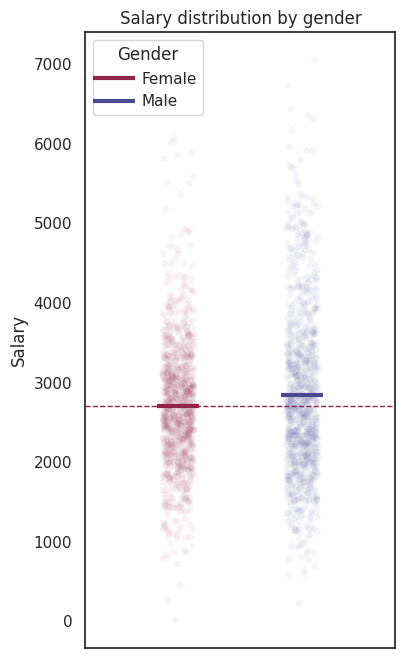

In [18]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(4, 8))

# Salary distribution by gender
sns.stripplot(
    data=df, y="Salary", hue="Gender",
    dodge=True, alpha=.05, legend=False, ax=ax
)
sns.pointplot(
    data=df, y="Salary", hue="Gender",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=30, markeredgewidth=3,
)
# Draw a horizontal line
ax.axhline(y=mean_f, color='#912448', linestyle='--', linewidth=1)
# Set title
ax.set_title('Salary distribution by gender')

In [19]:
sns.set_style("ticks")

Text(0.5, 1.0, 'Salary distribution by job family & gender')

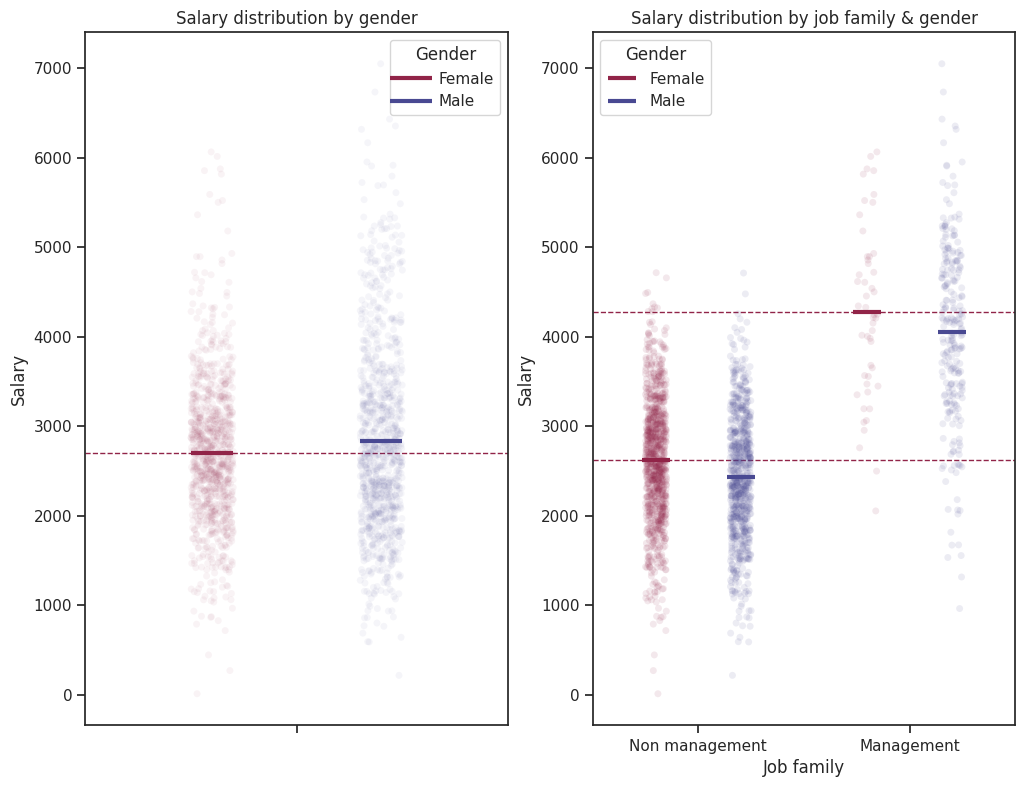

In [20]:
# Set up the figure with 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 9))

# Salary distribution by gender
sns.stripplot(
    data=df, y="Salary", hue="Gender",
    dodge=True, alpha=.05, legend=False, ax=axes[0]
)
sns.pointplot(
    data=df, y="Salary", hue="Gender",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=30, markeredgewidth=3, ax=axes[0]
)
# Draw a horizontal line
axes[0].axhline(y=mean_f, color='#912448', linestyle='--', linewidth=1)
axes[0].set_title('Salary distribution by gender')

# Salary distribution by job family & gender
sns.stripplot(
    data=df, x="Job family", y="Salary", hue="Gender",
    dodge=True, alpha=.1, legend=False, ax=axes[1]
);
sns.pointplot(
    data=df, x="Job family", y="Salary", hue="Gender",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3, ax=axes[1]
);
# Draw horizontal lines
axes[1].axhline(y=mean_fn, color='#912448', linestyle='--', linewidth=1)
axes[1].axhline(y=mean_fm, color='#912448', linestyle='--', linewidth=1)
axes[1].set_title('Salary distribution by job family & gender')